# Методы метрической классификации

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

## Задания для выполнения

1.	Загрузите данные о диагностике сахарного диабета

In [4]:
dbt = pd.read_csv("diabetes.csv")
dbt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
def describe(D):
    print('\n DESCRIPTION: \n',D.describe(),'\n\n SHAPE:',D.shape, '\n\n INFO:')
    return D.info()

In [7]:
describe(dbt) # чистые


 DESCRIPTION: 
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000 

2.	Разделите эти данные на тестовую и обучающую выборки

In [9]:
Y = dbt['Outcome']
X = dbt.drop(['Outcome'], axis=1)

In [10]:
X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [11]:
Y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

3.	Постройте модель классификации для определения заболевания

In [14]:
cls = LogisticRegression()
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# эффективность предсказания тестовой выборки при помощи матрицы классификации
LR = metrics.confusion_matrix(y_test, y_pred)
LR

array([[89, 10],
       [24, 31]])

Text(0.5, 15.0, 'Предсказанные значения')

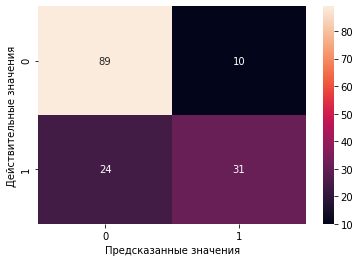

In [17]:
# матрица классификации в графической форме
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

4.	Оцените качество модели на тестовой выборке с помощью следующих метрик:

a.	достоверность предсказания (accuracy);

b.	точность (precision);

c.	полнота (recall);

In [18]:
print('Достоверность предсказания (accuracy):', metrics.accuracy_score(y_test, y_pred))
print('Точность предсказания (precision):', metrics.precision_score(y_test, y_pred, average="binary"))
print('Полнота предсказания (recall):', metrics.recall_score(y_test, y_pred))

Достоверность предсказания (accuracy): 0.7792207792207793
Точность предсказания (precision): 0.7560975609756098
Полнота предсказания (recall): 0.5636363636363636


In [ ]:
# кривая обучения


In [36]:
reg = []
acc = []
prec = []
rec = []
TP = []
FP = []
FN = []
TN = []

reg.append('LogisticRegression')
acc.append(metrics.accuracy_score(y_test, y_pred))
prec.append(metrics.precision_score(y_test, y_pred, average="binary"))
rec.append(metrics.recall_score(y_test, y_pred))

TP.append(LR[0][0])
FP.append(LR[0][1])
FN.append(LR[1][0])
TN.append(LR[1][1])

 5. Вывод о применимости модели.

## Дополнительные задания

1.	Используйте метод опорных векторов для построения альтернативной модели предсказания диабета.


In [21]:
SVM = svm.SVC()
SVM.fit(x_train, y_train)
y_pred_SVM = SVM.predict(x_test)

Text(0.5, 15.0, 'Предсказанные значения')

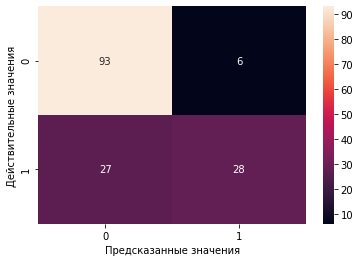

In [22]:
# матрица классификации в графической форме
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred_SVM)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [23]:
print('Достоверность предсказания (accuracy):', metrics.accuracy_score(y_test, y_pred_SVM))
print('Точность предсказания (precision):', metrics.precision_score(y_test, y_pred_SVM, average="binary"))
print('Полнота предсказания (recall):', metrics.recall_score(y_test, y_pred_SVM))

Достоверность предсказания (accuracy): 0.7857142857142857
Точность предсказания (precision): 0.8235294117647058
Полнота предсказания (recall): 0.509090909090909


In [ ]:
# кривая обучения


In [37]:
reg.append('SVM')
acc.append(metrics.accuracy_score(y_test, y_pred_SVM))
prec.append(metrics.precision_score(y_test, y_pred_SVM, average="binary"))
rec.append(metrics.recall_score(y_test, y_pred_SVM))

TP.append(metrics.confusion_matrix(y_test, y_pred_SVM)[0][0])
FP.append(metrics.confusion_matrix(y_test, y_pred_SVM)[0][1])
FN.append(metrics.confusion_matrix(y_test, y_pred_SVM)[1][0])
TN.append(metrics.confusion_matrix(y_test, y_pred_SVM)[1][1])

2.	Сравните метрики эффективности и сделайте вывод о том, какая модель лучше предсказывает заболевание.

In [39]:
ex = pd.DataFrame(columns = ['name','accuracy','precision','recall','TP','FP','FN','TN'])
ex['name'] = reg
ex['accuracy'] = acc
ex['precision'] = prec
ex['recall'] = rec
ex['TP'] = TP
ex['FP'] = FP
ex['FN'] = FN
ex['TN'] = TN
ex

,name,accuracy,precision,recall,TP,FP,FN,TN
0,LogisticRegression,0.779221,0.756098,0.563636,89,10,24,31
1,SVM,0.785714,0.823529,0.509091,93,6,27,28


SMV модель отличается меньшим количеством неправильно предсказанных значений
Это подтверждают бОльшие значения общей точности предсказания модели по всем классам - accuracy и точность модели при определении класса Positive - precision. Однако способность модели обнаруживать выборки, относящиеся к классу Positive - полнота предсказания - recall - оказалась меньше.

3.	Постройте модели классификации на основе следующих методов:


a.	логистическая регрессия (LogisticRegression);



In [ ]:
# см. ячейки ранее

b.	метод опорных векторов с линейным ядром (SVC);

In [43]:
def make_model(x_train, y_train, x_test, model, name = ''):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    reg.append(name)
    acc.append(metrics.accuracy_score(y_test, y_pred))
    prec.append(metrics.precision_score(y_test, y_pred, average="binary"))
    rec.append(metrics.recall_score(y_test, y_pred))
    
    metricss = metrics.confusion_matrix(y_test, y_pred)
    TP.append(metricss[0][0])
    FP.append(metricss[0][1])
    FN.append(metricss[1][0])
    TN.append(metricss[1][1])
    
    class_names = [0, 1]
    fig, ax = plt.subplots()
    ticks = np.arange(len(class_names))
    plt.xticks(ticks, class_names)
    plt.yticks(ticks, class_names)

    sns.heatmap(pd.DataFrame(
        metrics.confusion_matrix(y_test, y_pred)),
        annot=True)
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')

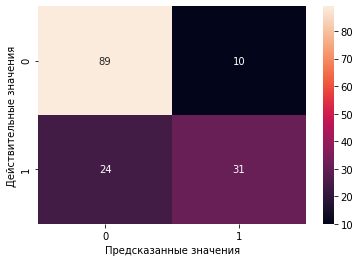

In [44]:
lin_SVC= svm.SVC(kernel='linear')
make_model(x_train, y_train, x_test, lin_SVC, name = 'linear_SVC')


c.	метод опорных векторов с гауссовым ядром (SVC);



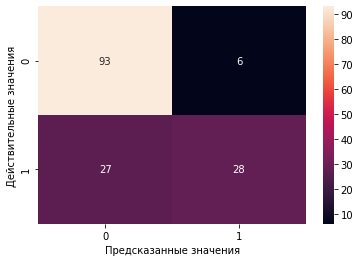

In [45]:
gauss_SVC= svm.SVC(kernel='rbf')
make_model(x_train, y_train, x_test, gauss_SVC, name = 'gauss_SVC')

d.	метод k ближайших соседей (KNeighborsClassifier);


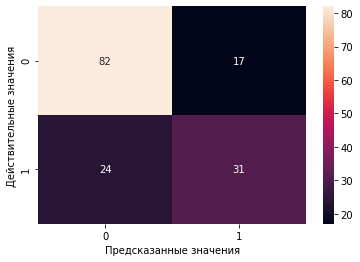

In [48]:
KNC = KNeighborsClassifier()
make_model(x_train, y_train, x_test, KNC, name = 'KNC')


e.	многослойный перцептрон (MLP);

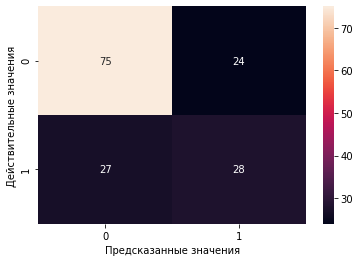

In [49]:
MLPC = MLPClassifier()
make_model(x_train, y_train, x_test, MLPC, name = 'MLPC')

4.	Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;

In [50]:
ex_fin = pd.DataFrame(columns = ['name','accuracy','precision','recall','TP','FP','FN','TN'])
ex_fin['name'] = reg
ex_fin['accuracy'] = acc
ex_fin['precision'] = prec
ex_fin['recall'] = rec
ex_fin['TP'] = TP
ex_fin['FP'] = FP
ex_fin['FN'] = FN
ex_fin['TN'] = TN
ex_fin

,name,accuracy,precision,recall,TP,FP,FN,TN
0,LogisticRegression,0.779221,0.756098,0.563636,89,10,24,31
1,SVM,0.785714,0.823529,0.509091,93,6,27,28
2,linear_SVC,0.779221,0.756098,0.563636,89,10,24,31
3,gauss_SVC,0.785714,0.823529,0.509091,93,6,27,28
4,KNC,0.733766,0.645833,0.563636,82,17,24,31
5,MLPC,0.668831,0.538462,0.509091,75,24,27,28


По всем показателям, кроме полноты, с наилучшей стороны нам показывает себя модель с применением метода опорных векторов

5.	Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.